In [10]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from test_data import experiment_data,add_noise,create_data_2d
from error_bounds import *

In [11]:
#Create data
n_samples=200
T,X,t,x = create_data_2d(T_start=0, T_end=5, L_x_start=0,L_x_end=5, N_t=n_samples, N_x=n_samples)


a=np.random.randn()
u = np.exp(X-a*T)
ux = u
uxx = u
uxxx = u
ut = -a*u

"""
u = np.cos(X-a*T)
ux = -np.sin(X-a*T)
uxx = -np.cos(X-a*T)
uxxx = np.sin(X-a*T)
ut = a*np.sin(X-a*T)
"""
dx=x[1]-x[0]

In [12]:
ux_fd = ps.FiniteDifference(order=3,d=1, axis=0, drop_endpoints=False)._differentiate(u, dx)
u_flat, u_x_flat = u.flatten(), ux_fd.flatten()

In [59]:
def error_bound_finite_diff_nth_derivative(eps,number_derivative,order,M,h):
    return (eps+np.finfo(float).eps)/(h**(number_derivative))+h**order

In [60]:
M=infinity_norm(uxxx)
number_derivative=4
number_noise=8 #<=10
noise_levels = [0]+[10**(-10+i) for i in range(0,number_noise-1)]
orders=range(number_derivative,20,1)
print("Order \t Noise level \t  eps \t \t|uxx-uxx_noise| \t bound")
diff_list = []
bound_list = []

for order in orders:
    print(f"{order}")
    avg_diff=0
    avg_bound=0
    for target_noise in noise_levels:
        var = target_noise * np.sqrt(np.mean(np.square(u)))
        noise = np.random.normal(0, var, size=u.shape)
        u_noise = u + noise
        
        uxx_noise = ps.FiniteDifference(order=order,d=number_derivative, axis=0, drop_endpoints=False)._differentiate(u_noise, dx)
        row_mask = ~np.isnan(uxx_noise).all(axis=1)
        col_mask = ~np.isnan(uxx_noise).all(axis=0)
        
        eps = infinity_norm(u_noise[row_mask][:, col_mask]-u[row_mask][:, col_mask])
        bound = error_bound_finite_diff_nth_derivative(eps,number_derivative,order,M,dx)
        
        diff = infinity_norm(uxx[row_mask][:, col_mask]-uxx_noise[row_mask][:, col_mask])
        
        avg_bound+=bound
        avg_diff+=diff
        
        print(f"\t {target_noise}\t \t  {eps:.3e} \t {diff:.4e} \t {bound:.4e}")
        
    avg_bound/=number_noise
    avg_diff/=number_noise
    bound_list.append(avg_bound)
    diff_list.append(avg_diff)

Order 	 Noise level 	  eps 	 	|uxx-uxx_noise| 	 bound
4
	 0	 	  0.000e+00 	 4.4127e-02 	 3.9909e-07
	 1e-10	 	  9.909e-07 	 6.7688e+02 	 2.4864e+00
	 1e-09	 	  1.054e-05 	 6.5555e+03 	 2.6438e+01
	 1e-08	 	  1.135e-04 	 6.7878e+04 	 2.8482e+02
	 1e-07	 	  1.027e-03 	 7.3637e+05 	 2.5782e+03
	 1e-06	 	  1.075e-02 	 5.5002e+06 	 2.6980e+04
	 1e-05	 	  9.823e-02 	 5.8767e+07 	 2.4649e+05
	 0.0001	 	  1.004e+00 	 5.9582e+08 	 2.5202e+06
5
	 0	 	  0.000e+00 	 3.3701e-02 	 1.0571e-08
	 1e-10	 	  9.200e-07 	 1.3147e+03 	 2.3085e+00
	 1e-09	 	  1.143e-05 	 1.5795e+04 	 2.8688e+01
	 1e-08	 	  1.306e-04 	 1.4351e+05 	 3.2765e+02
	 1e-07	 	  9.369e-04 	 1.8942e+06 	 2.3509e+03
	 1e-06	 	  1.052e-02 	 1.6191e+07 	 2.6406e+04
	 1e-05	 	  1.009e-01 	 1.3799e+08 	 2.5328e+05
	 0.0001	 	  9.445e-01 	 1.2783e+09 	 2.3698e+06
6
	 0	 	  0.000e+00 	 8.0199e-02 	 8.0875e-10
	 1e-10	 	  9.371e-07 	 2.8821e+03 	 2.3514e+00
	 1e-09	 	  1.047e-05 	 3.6924e+04 	 2.6274e+01
	 1e-08	 	  1.023e-04 	 3.0934e+05 	 2

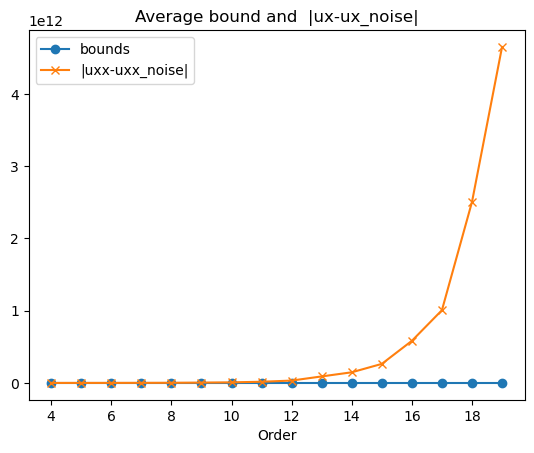

In [61]:
plt.title("Average bound and  |ux-ux_noise|")
plt.xlabel("Order")
plt.plot(orders,bound_list, marker='o',label='bounds')
plt.plot(orders,diff_list,marker='x',label='|uxx-uxx_noise|')
plt.legend()

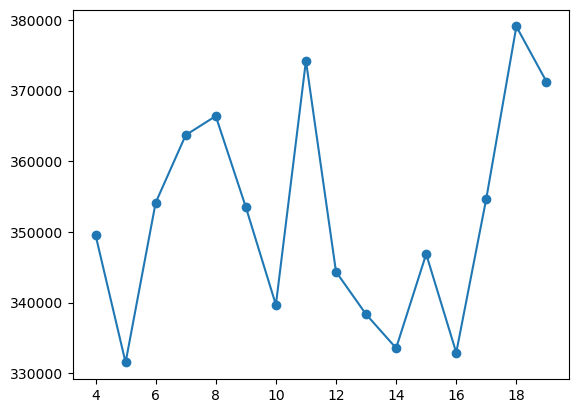

In [62]:
plt.plot(orders,bound_list, marker='o',label='bounds')

In [69]:
M=infinity_norm(uxxx)
number_derivative=4
number_noise=8 #<=10
noise_levels = [0]+[10**(-10+i) for i in range(0,number_noise-1)]
orders=range(number_derivative,20,1)
print("Order \t Noise level \t  eps \t \t|uxx-uxx_noise| \t bound \t meas_bound \t approx_bound")
diff_list = []
bound_list = []
target_noise=1e-09
for order in orders:
    print(f"{order}")

    var = target_noise * np.sqrt(np.mean(np.square(u)))
    noise = np.random.normal(0, var, size=u.shape)
    u_noise = u + noise
    
    uxx_noise = ps.FiniteDifference(order=order,d=number_derivative, axis=0, drop_endpoints=False)._differentiate(u_noise, dx)
    row_mask = ~np.isnan(uxx_noise).all(axis=1)
    col_mask = ~np.isnan(uxx_noise).all(axis=0)
    
    eps = infinity_norm(u_noise[row_mask][:, col_mask]-u[row_mask][:, col_mask])
    meas_bound=100*(eps+np.finfo(float).eps)/(dx**(number_derivative))
    approx_bound=dx**order
    bound = meas_bound+approx_bound
    
    diff = infinity_norm(uxx[row_mask][:, col_mask]-uxx_noise[row_mask][:, col_mask])
    
    print(f"\t {target_noise}\t \t  {eps:.3e} \t {diff:.4e} \t \t {bound:.4e} \t {meas_bound:.4e}\t {approx_bound:.4e}")
        
    bound_list.append(bound)
    diff_list.append(diff)

Order 	 Noise level 	  eps 	 	|uxx-uxx_noise| 	 bound 	 meas_bound 	 approx_bound
4
	 1e-09	 	  9.634e-06 	 5.1928e+03 	 	 2.4173e+03 	 2.4173e+03	 3.9854e-07
5
	 1e-09	 	  1.052e-05 	 1.3195e+04 	 	 2.6400e+03 	 2.6400e+03	 1.0013e-08
6
	 1e-09	 	  9.277e-06 	 2.8715e+04 	 	 2.3277e+03 	 2.3277e+03	 2.5159e-10
7
	 1e-09	 	  9.586e-06 	 7.6134e+04 	 	 2.4054e+03 	 2.4054e+03	 6.3215e-12
8
	 1e-09	 	  1.049e-05 	 1.3240e+05 	 	 2.6332e+03 	 2.6332e+03	 1.5883e-13
9
	 1e-09	 	  9.822e-06 	 2.8738e+05 	 	 2.4645e+03 	 2.4645e+03	 3.9907e-15
10
	 1e-09	 	  9.846e-06 	 6.5543e+05 	 	 2.4705e+03 	 2.4705e+03	 1.0027e-16
11
	 1e-09	 	  9.891e-06 	 1.5276e+06 	 	 2.4817e+03 	 2.4817e+03	 2.5193e-18
12
	 1e-09	 	  1.115e-05 	 2.7005e+06 	 	 2.7985e+03 	 2.7985e+03	 6.3300e-20
13
	 1e-09	 	  9.512e-06 	 4.7749e+06 	 	 2.3869e+03 	 2.3869e+03	 1.5905e-21
14
	 1e-09	 	  1.043e-05 	 1.1634e+07 	 	 2.6164e+03 	 2.6164e+03	 3.9961e-23
15
	 1e-09	 	  1.025e-05 	 2.2740e+07 	 	 2.5723e+03 	 2.5723e+03	

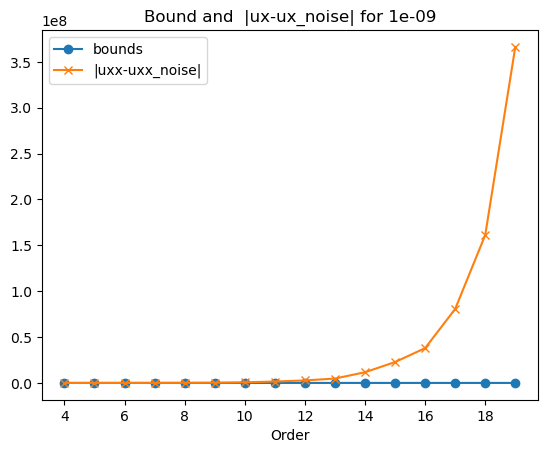

In [70]:
plt.title(f"Bound and  |ux-ux_noise| for {target_noise}")
plt.xlabel("Order")
plt.plot(orders,bound_list, marker='o',label='bounds')
plt.plot(orders,diff_list,marker='x',label='|uxx-uxx_noise|')
plt.legend()

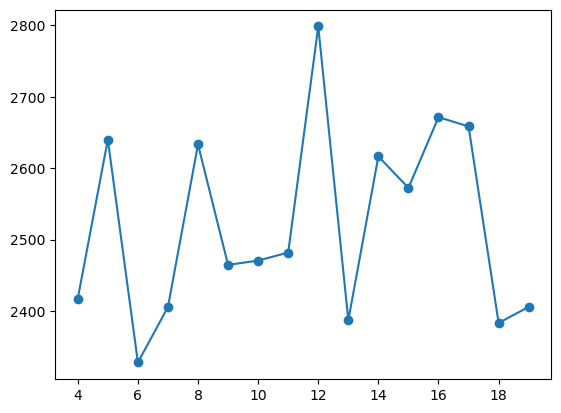

In [72]:
plt.plot(orders,bound_list, marker='o',label='bounds')